# 10 - Desafio

## Analisando dados de roubos de celular

Algumas perguntas com relação ao dataset podem ser respondidas
- Como os roubos de celular evoluíram em relação ao tempo e como podem evoluir nos próximos anos?
- Quais são os períodos mais perigosos?
- Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices de roubos de celular?
- Quais os veículos mais visados pelos ladrões para roubar um celular de dentro de um veículo?

Dataset disponível em: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,DEINTER 3,SEC Bebedouro,Viradouro,DM - Viradouro,1,1,100215,4,2015,2015-04-27 20:05:42,...,NaN,NaN,Vítima,Feminino,54,1960-06-11,Parda,FAXINEIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
1,DEINTER 2,SEC Jundiaí,Itupeva,DM - Itupeva,1,1,70404,4,2015,2015-04-12 10:36:18,...,NaN,NaN,Vítima,Feminino,44,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
2,DEINTER 1,SEC São Sebastião,Ubatuba,DM - Ubatuba,1,1,40304,4,2015,2015-04-18 20:23:50,...,NaN,NaN,Vítima,Feminino,37,1977-07-08,Parda,AJUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
3,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,1,1,20249,4,2015,2015-04-25 00:40:09,...,NaN,NaN,Vítima,Feminino,17,1997-12-31,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
4,DEMACRO,SEC Mogi das Cruzes,Suzano,DM - Suzano,1,1,30309,5,2015,2015-05-16 14:37:19,...,NaN,NaN,Vítima,Feminino,20,1994-07-22,Branca,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
5,DEMACRO,SEC Carapicuíba,Carapicuíba,002 DP - Carapicuiba,1,1,30427,5,2015,2015-05-03 23:06:43,...,NaN,NaN,Vítima,Feminino,23,1991-05-25,Preta,OPERADOR(A) TELEMARKETING,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
6,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1,1,200100,5,2015,2015-05-16 19:57:57,...,NaN,NaN,Vítima,Feminino,30,1984-09-07,Parda,ATENDENTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
7,DEINTER 9,SEC Limeira,Leme,002 DP - Leme,1,1,70807,6,2015,2015-06-12 18:53:53,...,NaN,NaN,Vítima,Feminino,21,1993-06-07,Branca,POLICIAL MILITAR,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
8,DEINTER 9,SEC Americana,Sumaré,005 DP - Sumaré,1,1,70926,6,2015,2015-06-14 17:02:22,...,NaN,NaN,Vítima,Feminino,55,1959-08-04,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
9,DEINTER 7,SEC Itapeva,Guapiara,DM - Guapiara,1,1,120413,6,2015,2015-06-06 17:06:22,...,NaN,NaN,Vítima,Feminino,32,1982-12-01,Branca,EMPREGADO DOMESTICO,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,DEINTER 3,SEC Bebedouro,Viradouro,DM - Viradouro,1,1,100215,4,2015,2015-04-27 20:05:42,...,NaN,NaN,Vítima,Feminino,54,1960-06-11,Parda,FAXINEIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
1,DEINTER 2,SEC Jundiaí,Itupeva,DM - Itupeva,1,1,70404,4,2015,2015-04-12 10:36:18,...,NaN,NaN,Vítima,Feminino,44,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
2,DEINTER 1,SEC São Sebastião,Ubatuba,DM - Ubatuba,1,1,40304,4,2015,2015-04-18 20:23:50,...,NaN,NaN,Vítima,Feminino,37,1977-07-08,Parda,AJUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
3,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,1,1,20249,4,2015,2015-04-25 00:40:09,...,NaN,NaN,Vítima,Feminino,17,1997-12-31,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
4,DEMACRO,SEC Mogi das Cruzes,Suzano,DM - Suzano,1,1,30309,5,2015,2015-05-16 14:37:19,...,NaN,NaN,Vítima,Feminino,20,1994-07-22,Branca,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
5,DEMACRO,SEC Carapicuíba,Carapicuíba,002 DP - Carapicuiba,1,1,30427,5,2015,2015-05-03 23:06:43,...,NaN,NaN,Vítima,Feminino,23,1991-05-25,Preta,OPERADOR(A) TELEMARKETING,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
6,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1,1,200100,5,2015,2015-05-16 19:57:57,...,NaN,NaN,Vítima,Feminino,30,1984-09-07,Parda,ATENDENTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
7,DEINTER 9,SEC Limeira,Leme,002 DP - Leme,1,1,70807,6,2015,2015-06-12 18:53:53,...,NaN,NaN,Vítima,Feminino,21,1993-06-07,Branca,POLICIAL MILITAR,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
8,DEINTER 9,SEC Americana,Sumaré,005 DP - Sumaré,1,1,70926,6,2015,2015-06-14 17:02:22,...,NaN,NaN,Vítima,Feminino,55,1959-08-04,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
9,DEINTER 7,SEC Itapeva,Guapiara,DM - Guapiara,1,1,120413,6,2015,2015-06-06 17:06:22,...,NaN,NaN,Vítima,Feminino,32,1982-12-01,Branca,EMPREGADO DOMESTICO,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
3,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,1,1,20249,4,2015,2015-04-25 00:40:09,...,NaN,NaN,Vítima,Feminino,17,1997-12-31,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
6,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1,1,200100,5,2015,2015-05-16 19:57:57,...,NaN,NaN,Vítima,Feminino,30,1984-09-07,Parda,ATENDENTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
34,DECAP,7ª SEC,São Paulo,032 DP - Itaquera,1,1,10326,11,2015,2015-11-28 17:07:48,...,NaN,NaN,Vítima,Feminino,30,1984-12-06,Branca,OPERADOR(A) TELEMARKETING,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
35,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,1,1,10358,11,2015,2015-11-04 12:15:35,...,NaN,NaN,Vítima,Feminino,30,1985-04-24,Branca,CORRETOR(A) DE IMOVEIS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
39,DECAP,6ª SEC,São Paulo,047 DP - Capão Redondo,1,1,10247,12,2015,2015-12-21 12:57:28,...,NaN,NaN,Vítima,Feminino,34,1981-02-16,Parda,SECRETARIO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
40,DECAP,4ª SEC,São Paulo,045 DP - Vila Brasilândia,1,1,200100,12,2015,2015-12-21 00:53:24,...,NaN,NaN,Vítima,Feminino,38,1977-06-22,Branca,EMPREGADO DOMESTICO,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


3                     estudante
6                     atendente
34    operador(a) telemarketing
35       corretor(a) de imoveis
39                secretario(a)
40          empregado domestico
Name: PROFISSAO, dtype: object

3                     estudante
6                     atendente
34    operador(a)_telemarketing
35       corretor(a)_de_imoveis
39                secretario(a)
40          empregado_domestico
Name: PROFISSAO, dtype: object

3    1970-01-01 00:00:00.000002015
6    1970-01-01 00:00:00.000002015
34   1970-01-01 00:00:00.000002015
35   1970-01-01 00:00:00.000002015
39   1970-01-01 00:00:00.000002015
40   1970-01-01 00:00:00.000002015
Name: ANO ESTATISTICA, dtype: datetime64[ns]

São Paulo                 6
Campinas                  3
São Roque                 2
Santos                    2
Sumaré                    2
São Bernardo do Campo     2
Mairinque                 2
Viradouro                 1
Bastos                    1
Francisco Morato          1
Cotia                     1
Vargem Grande Paulista    1
Ibitinga                  1
Ouro Verde                1
Franca                    1
São José do Rio Preto     1
Itapevi                   1
Guarulhos                 1
Itupeva                   1
Itaquaquecetuba           1
Miguelópolis              1
Bauru                     1
Tarabaí                   1
Guapiara                  1
Leme                      1
Carapicuíba               1
Suzano                    1
Ubatuba                   1
São Simão                 1
Name: MUNICIPIO_CIRCUNSCRICAO, dtype: int64

<BarContainer object of 6 artists>

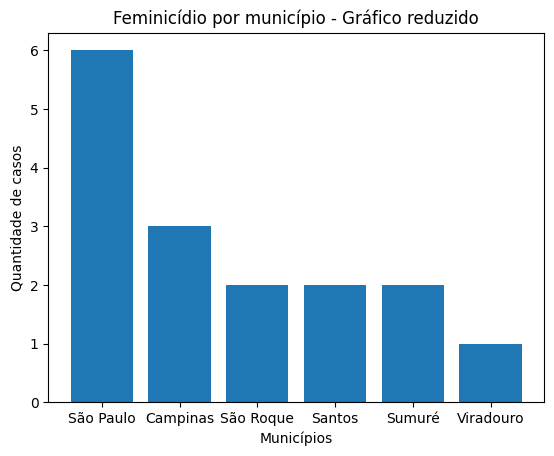

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

v1 = pd.read_excel('Feminicidio.xlsx', sheet_name="Abr2015")
display(v1)

# REMOVENDO DADOS DUPLICADOS 
v2 = v1.drop_duplicates()
display(v2)

# FILTRANDO DADOS DE S. PAULO
v3 = v2[v2['MUNICIPIO_CIRCUNSCRICAO'] == 'São Paulo']
display(v3)

# TRANSFORMANDO STRINGS PARA LOWER CASE
v4 = v3['PROFISSAO'].str.lower()
display(v4)

# PADRONIZANDO STRING
v5 = v4.str.replace(' ', '_')
display(v5)

# TRANSFORMANDO DADOS TEMPORAIS NO TIPO APROPRIADO
v6 = pd.to_datetime(v3['ANO ESTATISTICA'])
display(v6)

# ANÁLISE EXPLORATÓRIA COM VISUALIZAÇÕES (GRÁFICOS E ESTATÍSTICAS)
v7 = v1['MUNICIPIO_CIRCUNSCRICAO'].value_counts()
display(v7)

name = ['São Paulo', 'Campinas', 'São Roque', 'Santos', 'Sumuré', 'Viradouro']
values = [6, 3, 2, 2, 2, 1]
plt.ylabel('Quantidade de casos')
plt.xlabel('Municípios')
plt.title('Feminicídio por município - Gráfico reduzido')
plt.bar(name, values)

## Análise Exploratória

Agora é a hora de descobrir relações e algumas *hidden informations* no meio das linhas do dataset.